In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import tensorflow as tf
from tensorflow import keras

# Model architecture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, DepthwiseConv2D, BatchNormalization
# Data processing
from tensorflow.keras.utils import to_categorical
# model
from tensorflow.keras import optimizers 
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
data_path = os.getcwd()
data_path = data_path + '/drive/MyDrive/ML_projects/CIFAR10/data/'

# #train path
# train_data_path = data_path + '\\train\\'
data_path

'/content/drive/MyDrive/ML_projects/CIFAR10/data/'

In [4]:
images = pd.read_json(data_path + 'img_labeled.json')
images.head()

,images,label
0,"[[[63, 62, 59], [45, 46, 43], [43, 48, 50], [4...",frog
1,"[[[187, 177, 154], [136, 137, 126], [95, 104, ...",truck
2,"[[[255, 255, 255], [253, 253, 253], [253, 253,...",truck
3,"[[[10, 25, 28], [19, 34, 37], [20, 35, 38], [2...",deer
4,"[[[198, 180, 170], [196, 178, 168], [203, 185,...",automobile


In [5]:
## convert all images array to ndarray
x_train = images['images'].values
for i in range(len(x_train)):
    x_train[i] = np.array(x_train[i],dtype='float32')
# X_train,X_test,Y_train,Y_test = train_test_split(x_train,images['label'].values,test_size=0.2,random_state=0)
X_train = x_train[:30000]
X_test = x_train[30000:40000]
X_val = x_train[40000:]
# normalize X_train and Y_train between 0-1
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val/255

# train values
arr = []
for i in range(len(X_train)):
    arr.append(X_train[i])
X_train = np.array(arr)

# test values
arr = []
for i in range(len(X_test)):
    arr.append(X_test[i])
X_test = np.array(arr)

# validation values
arr = []
for i in range(len(X_val)):
    arr.append(X_val[i])
X_val = np.array(arr)

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'X validation shape: {X_val.shape}')

### Y train, test and validation

y = images['label'].values
Y_train = y[:30000]
Y_test = y[30000:40000]
Y_val = y[40000:]
Y_test


X train shape: (30000, 32, 32, 3)
X test shape: (10000, 32, 32, 3)
X validation shape: (10000, 32, 32, 3)


array(['airplane', 'frog', 'airplane', ..., 'frog', 'bird', 'ship'],
      dtype=object)

In [6]:
labels = images['label'].unique().tolist()
print(labels)

['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship', 'cat', 'dog', 'airplane']


In [7]:
# label encoding
for i in range(len(Y_train)):
  Y_train[i] = labels.index(Y_train[i])

Y_train[0]
for i in range(len(Y_test)):
  Y_test[i] = labels.index(Y_test[i])
Y_test[0]

for i in range(len(Y_val)):
  Y_val[i] = labels.index(Y_val[i])
# # le = LabelEncoder()
# # Y_train = le.fit_transform(Y_train)
# # Y_test = le.fit_transform(Y_test)
# # Y_val = le.fit_transform(Y_val)
# ## convert label to one hot encoding
Y_train = to_categorical(Y_train,len(labels))
Y_test = to_categorical(Y_test, len(labels))
Y_val = to_categorical(Y_val, len(labels))
print(Y_train[0])


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
batch_size = 32 
epochs = 50

In [9]:
# first model details
# batch size 32
# kernal size = 3x3
# 3 layers

model_32_5 = Sequential()

# 1. layer
model_32_5.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=X_train.shape[1:]))
# 2. layer
model_32_5.add(Conv2D(64,kernel_size=3,activation='relu'))

# 3. layer
model_32_5.add(Conv2D(64,kernel_size=3,activation='relu'))
model_32_5.add(MaxPooling2D(pool_size=(2,2)))

#4. layer
model_32_5.add(Conv2D(64,kernel_size=3,activation='relu'))
model_32_5.add(MaxPooling2D(pool_size=(2,2)))

# 5.layer
model_32_5.add(Conv2D(64,kernel_size=3,activation='relu'))
model_32_5.add(MaxPooling2D(pool_size=(2,2)))
model_32_5.add(Dropout(rate=0.2))

# connetcted and output layer
model_32_5.add(Flatten())
model_32_5.add(Dense(512,activation='relu'))
model_32_5.add(Dense(10,activation='softmax'))

model_32_5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [10]:
model_32_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [11]:
history = model_32_5.fit(X_train,Y_train,epochs=epochs,validation_data=(X_val,Y_val))

Epoch 1/50
938/938 [==============================] - 16s 9ms/step - loss: 1.8400 - accuracy: 0.3124 - val_loss: 1.5959 - val_accuracy: 0.4200
Epoch 2/50
938/938 [==============================] - 8s 8ms/step - loss: 1.5102 - accuracy: 0.4474 - val_loss: 1.3872 - val_accuracy: 0.4948
Epoch 3/50
938/938 [==============================] - 8s 8ms/step - loss: 1.3730 - accuracy: 0.5014 - val_loss: 1.3491 - val_accuracy: 0.5190
Epoch 4/50
938/938 [==============================] - 8s 8ms/step - loss: 1.2589 - accuracy: 0.5499 - val_loss: 1.2332 - val_accuracy: 0.5575
Epoch 5/50
938/938 [==============================] - 8s 8ms/step - loss: 1.1749 - accuracy: 0.5835 - val_loss: 1.1641 - val_accuracy: 0.5848
Epoch 6/50
938/938 [==============================] - 8s 8ms/step - loss: 1.0996 - accuracy: 0.6110 - val_loss: 1.1155 - val_accuracy: 0.6058
Epoch 7/50
938/938 [==============================] - 8s 8ms/step - loss: 1.0381 - accuracy: 0.6332 - val_loss: 1.1114 - val_accuracy: 0.6038
Epoch

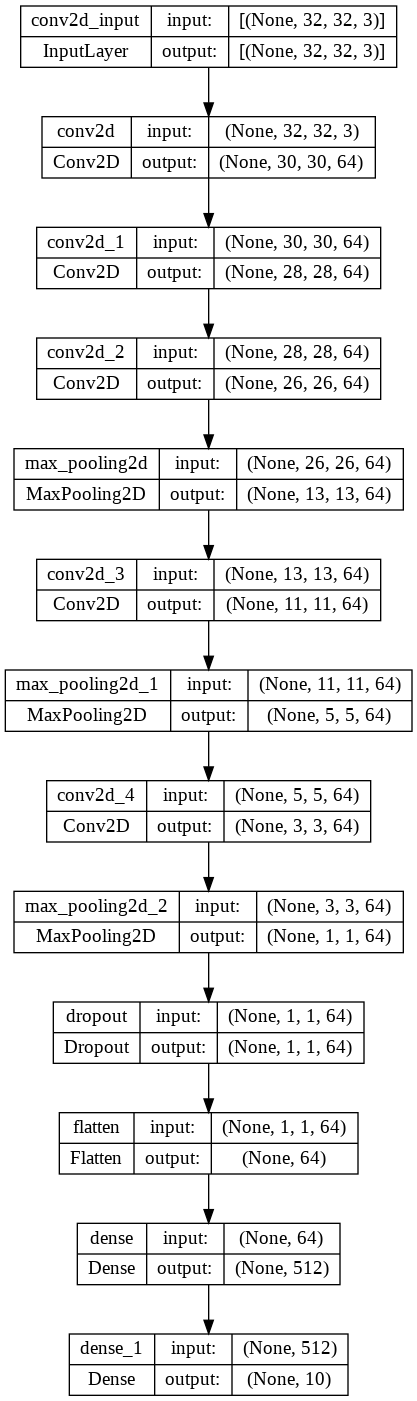

In [12]:
# visulize layers of model
from tensorflow.keras.utils import plot_model
plot_model(model_32_5, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

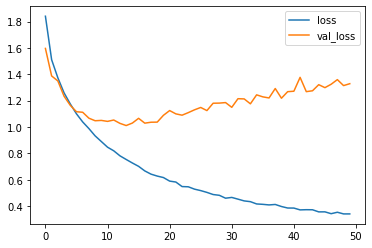

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

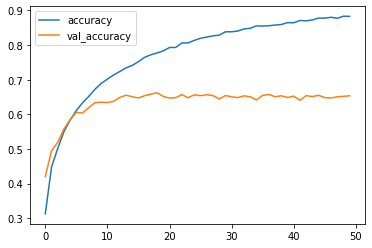

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

In [15]:
model_32_5.save(data_path+'5_layer_64/')

In [16]:
predect = model_32_5.predict(X_test)
predect

313/313 [==============================] - 1s 3ms/step


array([[5.3403862e-02, 2.5080994e-02, 3.0486939e-02, ..., 5.5749763e-02,
        2.5772317e-03, 1.0870578e-01],
       [7.6404740e-03, 2.9216617e-06, 9.2767161e-01, ..., 2.1157864e-02,
        3.0805018e-02, 2.0130168e-05],
       [1.5880023e-03, 1.4727104e-04, 2.7313868e-03, ..., 9.5745141e-05,
        1.5348886e-04, 9.6904993e-01],
       ...,
       [9.9717522e-01, 2.8730608e-07, 1.4383718e-03, ..., 2.7085046e-04,
        5.7696332e-05, 8.6255932e-07],
       [3.7454711e-07, 1.7652521e-03, 1.0490313e-05, ..., 5.9584522e-06,
        2.1640277e-05, 9.9698997e-01],
       [6.2244377e-13, 1.6580047e-05, 2.5652509e-09, ..., 4.8671085e-09,
        8.0352536e-10, 1.1607304e-05]], dtype=float32)

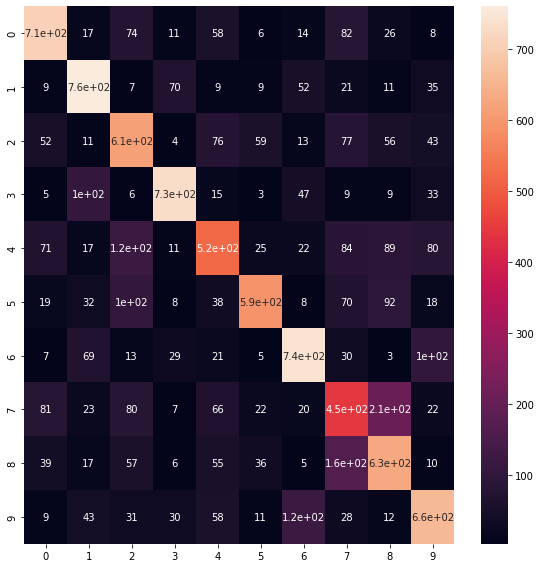

In [17]:
true_values = np.argmax(Y_test,axis=1)
y_pred = np.argmax(predect,axis=1)
labels_arr = []
for lab in labels:
  labels_arr.append(lab)
## calcualte error ratio
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(true_values,y_pred)
fig,axis = plt.subplots(figsize=(8,8))
sns.heatmap(cm,annot=True)

fig.tight_layout()
plt.show()

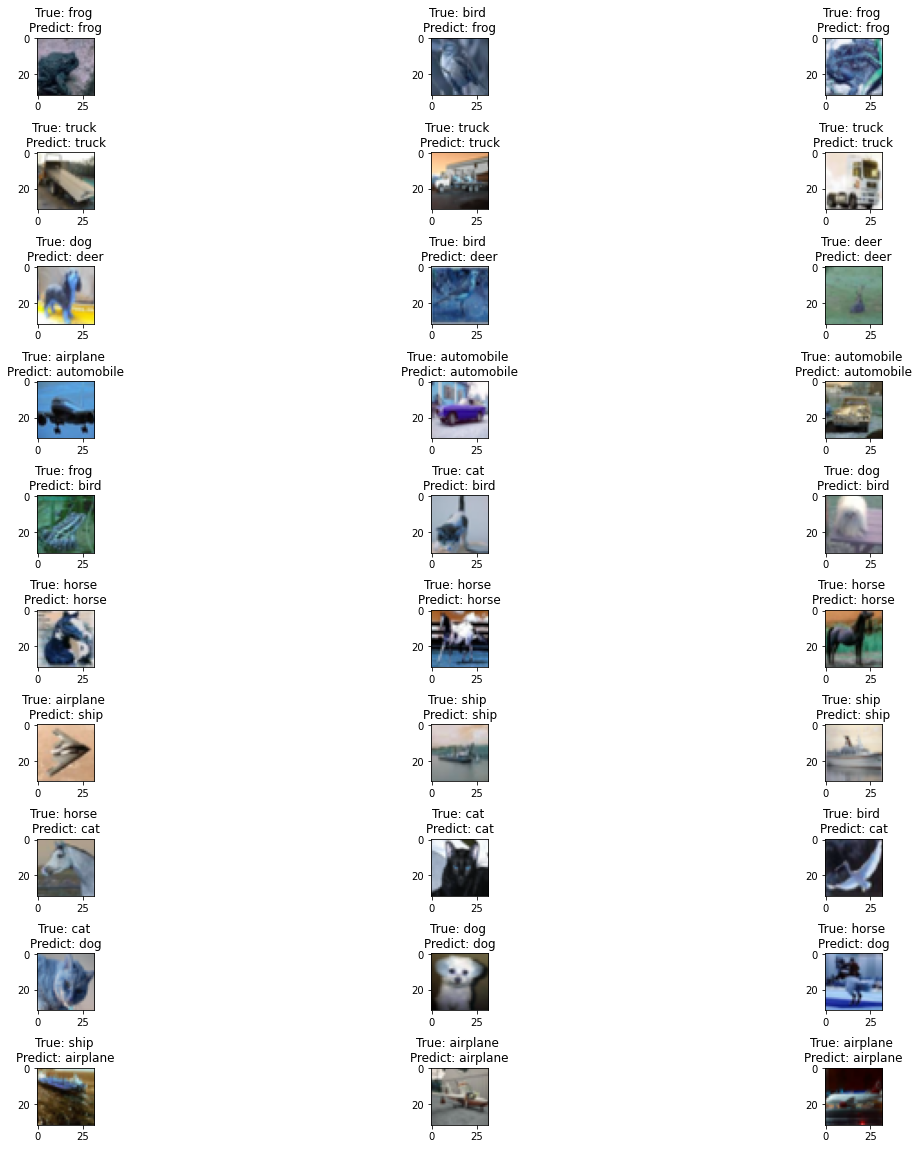

In [18]:
import random
fig,axis = plt.subplots(10,3,figsize=(20,20))
axis = axis.ravel()
axis = axis.reshape(10,3)

for i in range(len(labels)):
  indexs = []
  for j in range(len(y_pred)):
    if y_pred[j] == i:
      indexs.append(j)
  for j in range(3):
    index = random.choice(indexs)
    axis[i,j].imshow(X_test[index])
    axis[i,j].set_title(f'True: {labels[true_values[index]]} \nPredict: {labels[y_pred[index]]}')
  plt.subplots_adjust(hspace=1)
